In [1]:
#imports

import requests
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB



In [2]:
df=pd.read_csv('../data/stemmed.csv')
df.head()

,Unnamed: 0,subreddit,text,tokenized,no_stopwords,stemmed,length
0,0,1,Simple slow run. :),"['simple', 'slow', 'run']",simple slow run,simpl slow run,4
1,1,1,Made a mini snowboard on my 3d printer,"['made', 'a', 'mini', 'snowboard', 'on', 'my',...",made mini 3d printer,made a mini snowboard on my 3d printer,8
2,2,1,Advise for a Snowboard to Buy,"['advise', 'for', 'a', 'snowboard', 'to', 'buy']",advise buy,advis for a snowboard to buy,6
3,3,1,Here are the brackets for NST at Revelstoke. ...,"['here', 'are', 'the', 'brackets', 'for', 'nst...",brackets nst revelstoke think matchups,here are the bracket for nst at revelstok what...,15
4,4,1,How to fall on boxes and rails?,"['how', 'to', 'fall', 'on', 'boxes', 'and', 'r...",fall boxes rails,how to fall on box and rail,7


In [3]:
df.shape

(9708, 7)

In [4]:
df=df.drop(columns='Unnamed: 0')
df.head()

,subreddit,text,tokenized,no_stopwords,stemmed,length
0,1,Simple slow run. :),"['simple', 'slow', 'run']",simple slow run,simpl slow run,4
1,1,Made a mini snowboard on my 3d printer,"['made', 'a', 'mini', 'snowboard', 'on', 'my',...",made mini 3d printer,made a mini snowboard on my 3d printer,8
2,1,Advise for a Snowboard to Buy,"['advise', 'for', 'a', 'snowboard', 'to', 'buy']",advise buy,advis for a snowboard to buy,6
3,1,Here are the brackets for NST at Revelstoke. ...,"['here', 'are', 'the', 'brackets', 'for', 'nst...",brackets nst revelstoke think matchups,here are the bracket for nst at revelstok what...,15
4,1,How to fall on boxes and rails?,"['how', 'to', 'fall', 'on', 'boxes', 'and', 'r...",fall boxes rails,how to fall on box and rail,7


# Random Forest

In [5]:
df2=df[df['no_stopwords'].notnull()]


In [6]:
df2.shape

(9671, 6)

In [7]:
X=df2['no_stopwords']
y=df2['subreddit']

In [8]:
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state=23, stratify=y)

In [9]:
pipe=Pipeline([
    ('cvec', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

In [10]:
pipe.get_params()

{'memory': None,
 'steps': [('cvec', CountVectorizer()), ('rf', RandomForestClassifier())],
 'verbose': False,
 'cvec': CountVectorizer(),
 'rf': RandomForestClassifier(),
 'cvec__analyzer': 'word',
 'cvec__binary': False,
 'cvec__decode_error': 'strict',
 'cvec__dtype': numpy.int64,
 'cvec__encoding': 'utf-8',
 'cvec__input': 'content',
 'cvec__lowercase': True,
 'cvec__max_df': 1.0,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__preprocessor': None,
 'cvec__stop_words': None,
 'cvec__strip_accents': None,
 'cvec__token_pattern': '(?u)\\b\\w\\w+\\b',
 'cvec__tokenizer': None,
 'cvec__vocabulary': None,
 'rf__bootstrap': True,
 'rf__ccp_alpha': 0.0,
 'rf__class_weight': None,
 'rf__criterion': 'gini',
 'rf__max_depth': None,
 'rf__max_features': 'auto',
 'rf__max_leaf_nodes': None,
 'rf__max_samples': None,
 'rf__min_impurity_decrease': 0.0,
 'rf__min_samples_leaf': 1,
 'rf__min_samples_split': 2,
 'rf__min_weight_fraction_leaf': 0.0,
 'rf__n_est

In [11]:
pipe_params = {
     'cvec__max_features': [3_000,  5_000],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.8, .9],
    'cvec__ngram_range': [(1, 1), (1, 2)],
    'rf__n_estimators':[100, 200],
    'rf__max_depth': [5, 10, 15]
}

In [12]:
gs = GridSearchCV(pipe, 
                  param_grid = pipe_params, 
                  cv = 5) 

In [13]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'cvec__max_df': [0.8, 0.9],
                         'cvec__max_features': [3000, 5000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'rf__max_depth': [5, 10, 15],
                         'rf__n_estimators': [100, 200]})

In [14]:
gs.best_params_ 

{'cvec__max_df': 0.9,
 'cvec__max_features': 5000,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 1),
 'rf__max_depth': 15,
 'rf__n_estimators': 200}

In [15]:
gs.score(X_train, y_train)

0.7019164483661933

In [16]:
pipe_params = {
     'cvec__max_features': [5_000,  7_000],
    'cvec__min_df': [3, 4],
    'cvec__max_df': [.7, .8],
    'cvec__ngram_range': [(1, 2)],
    'rf__n_estimators':[50, 100],
    'rf__max_depth': [15, 20, 25]
}

In [17]:
gs = GridSearchCV(pipe, 
                  param_grid = pipe_params, 
                  cv = 5) 

In [18]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'cvec__max_df': [0.7, 0.8],
                         'cvec__max_features': [5000, 7000],
                         'cvec__min_df': [3, 4], 'cvec__ngram_range': [(1, 2)],
                         'rf__max_depth': [15, 20, 25],
                         'rf__n_estimators': [50, 100]})

In [19]:
gs.best_params_

{'cvec__max_df': 0.8,
 'cvec__max_features': 5000,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 2),
 'rf__max_depth': 20,
 'rf__n_estimators': 100}

In [20]:
gs.score(X_train, y_train)

0.7179098304150007

In [21]:
gs.score(X_test, y_test)

0.6331679073614558

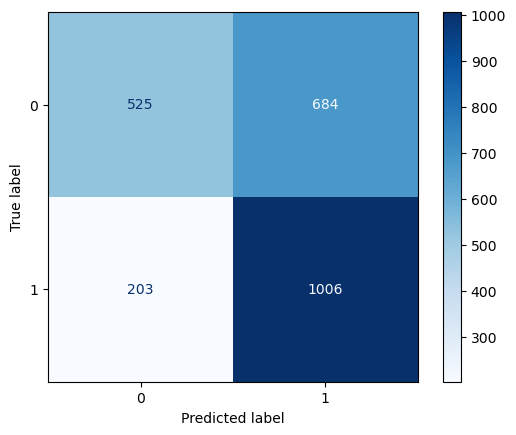

In [22]:
ConfusionMatrixDisplay.from_estimator(gs, X_test, y_test, cmap="Blues")

In [23]:
preds = gs.predict(X_test)

In [24]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

In [25]:
spec = tn / (tn + fp)

sens = tp / (tp + fn)

acc = (tp+tn) / (tp + tn+ fn+fp)

prec = tp/ (tp+fp)

print(f'Specificity: {spec}')

print(f'Sensativity: {sens}')

print(f'Accuracy: {acc}')

print(f'Precision: {prec}')

Specificity: 0.43424317617866004
Sensativity: 0.8320926385442514
Accuracy: 0.6331679073614558
Precision: 0.5952662721893491
